# 🥊 UFC Fight Predictor: Machine Learning Model BY RAYMOND HO

## 📌 Introduction
Welcome to the **UFC Fight Predictor**! This project aims to predict the **winner** of a UFC fight based on historical fight statistics using machine learning. 

This project is how I **dipped my toes into machine learning**, combining my interest in **UFC** with a hands-on approach to **data science**. Instead of just learning theory, I wanted to try to learn how to build this project from the bottom-up without any prior knowledge and experience. This way I can **learn** how to "learn" a new skill and apply it in a working project!

### **Why UFC?**
As a fan of the sport, I’ve always been curious about what factors determine a fight’s outcome. Does height and reach matter more than experience? Does a fighter’s win streak mean they have momentum, or is it just luck? **Machine learning was the perfect choice as it provides a solution to this as itgives a way to analyze these questions with real data.**

### **Skills I Learned!**
Through this project, I built a solid foundation in:
- **Data Preprocessing**  – Cleaning, organizing, and structuring raw fight data.
- **Feature Engineering**  – Selecting and creating meaningful statistics for the model.
- **Model Training & Evaluation**  – Experimenting with different machine learning models (e.g., Random Forest, XGBoost).
- **Hyperparameter Tuning**  – Using `GridSearchCV` to optimize model performance.
- **Data Visualization**  – Understanding feature importance and interpreting predictions.

This was my **first step into machine learning**, and it showed me how powerful data-driven predictions can be. Whether I continue improving this model or take on new machine learning projects, this experience gave me a taste of what machine learning can do!

In [25]:
#All the imports we need
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt



## 📊 Data Preprocessing
Before training the model, we need to prepare and clean our data.

- **Loading the dataset** : Importing fight history data.
- **Cleaning** : Handling missing values.
- **Feature Engineering** : Selecting fight statistics. the statistics were refined and selected from trial and error.


In [26]:
# Load dataset
df = pd.read_csv("ufc-master.csv")  

# Drop fights with no winner
df = df.dropna(subset=["Winner"])

# Convert 'Winner' column to binary (Red = 1, Blue = 0)
df["Winner"] = df["Winner"].map({"Red": 1, "Blue": 0})

# Convert Odds to Numeric 
df["RedOdds"] = pd.to_numeric(df["RedOdds"], errors="coerce")
df["BlueOdds"] = pd.to_numeric(df["BlueOdds"], errors="coerce")
# Drop rows where either RedOdds or BlueOdds is NaN
df = df.dropna(subset=["RedOdds", "BlueOdds"])

# Calculate Odds Difference
df["Odds_Diff"] = df["RedOdds"] - df["BlueOdds"]

In [27]:
# Add Feature Engineering
df["Strikes_Accuracy_Diff"] = df["RedAvgSigStrPct"] - df["BlueAvgSigStrPct"]
df["Takedown_Accuracy_Diff"] = df["RedAvgTDPct"] - df["BlueAvgTDPct"]

# Feature selection 
features = ['WinDif', 'LossDif', 'TotalRoundDif', 'HeightDif', 'ReachDif', 
            'AgeDif', 'SigStrDif', 'Odds_Diff', 'AvgTDDif', 'KODif', 'SubDif', 
            'Strikes_Accuracy_Diff', 'Takedown_Accuracy_Diff', 'WinStreakDif',
            'LoseStreakDif', 'LongestWinStreakDif', 'TotalTitleBoutDif',  'RedExpectedValue', 'BlueExpectedValue',
           ]  

existing_features = [col for col in features if col in df.columns] 
X = df[existing_features]
y = df["Winner"]

## 🔥 Model Training & Evaluation
I have tried XGBoost, RandomForest, and both with my dataset and found that just using RandomForest produced the highest accuracy in predicting the 
winner.

- **Hyperparameter Tuning** : Using `GridSearchCV` to optimize model performance.
- **Accuracy Metrics** : Evaluating model performance using precision, recall, and accuracy.


In [28]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Remove NaNs and keep data aligned
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  



grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 5, 6],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [200, 250, 300]},
             verbose=1)

In [29]:
# Train final model with best hyperparameters
best_params = grid_search.best_params_

final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    random_state=42
)


final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate model
accuracies = cross_val_score(estimator=final_model, X=X_train, y=y_train, cv=5)
print('Accuracy mean : ', accuracies.mean())
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy mean :  0.6531803962460897
Final Model Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.62      0.49      0.55       255
           1       0.70      0.79      0.74       374

    accuracy                           0.67       629
   macro avg       0.66      0.64      0.65       629
weighted avg       0.67      0.67      0.66       629



## 🏆 Fight Prediction
### **Is Jon Jones Ducking Tom Aspinall? 🤔**  
Like many UFC fans, I’ve been watching the **Jon Jones vs. Tom Aspinall drama** unfold. Jones has recently dominated Stipe Miocic, and some say he’s avoiding Aspinall, the rising heavyweight star. So, I decided to take matters into my own hands,**if the fight won’t happen anytime soon, why not let machine learning predict the outcome?**  

I gathered fight stats for both fighters, plugged them into the model, and let **data-driven analysis** determine who would win. Would **Jones' legendary fight IQ** overcome Aspinall’s speed and power? Or would the **greatest heavyweight of the new generation dethrone the GOAT?** 
Personally, I think that Aspinall, with his uncanny speed for a heavyweight, would be able to be the first fighter to knockout Jon Jones.

In [30]:
# Fight Data between Jon Jones [Red] vs Tom Aspinall [Blue]
new_fight = [[14, -2, 65, -2.54, 15.24, 6, -3.69, 235, -1.38, 0, 4, -0.09, 
              -0.55, 21, 0, 21, 15, 93, 127]]

# Convert to DataFrame
new_fight_df = pd.DataFrame(new_fight, columns=features)

# Make prediction 
prediction = final_model.predict(new_fight_df)

# Results
print("Predicted Winner: Red Fighter" if prediction[0] == 1 else "Predicted Winner: Blue Fighter")


Predicted Winner: Blue Fighter


### **Prediction Result**  
**The model predicts that Tom Aspinall would defeat Jon Jones.**  

### **Why Did the Model Favor Aspinall?**  
The prediction is based on **statistical advantages** in several key areas:  
**Striking and Takedown Accuracy** – Aspinall is more efficient, though it may be skewed as he has participated in less fights compared to Jones.  
**Speed & Movement** – Younger and more agile in the heavyweight division.  
**Recent Activity** – More active, while Jones has been sidelined with injuries.  

### **Does This Mean Jones Has No Chance?**  
Not necessarily. The model is based on **past data** and trends, but fights are unpredictable. Jon Jones has the highest **fight IQ in MMA history**, elite wrestling, and championship experience that **can’t be fully captured in stats**. 

### **Conclusion**  
The numbers say **Aspinall wins**—so maybe Jones really **is ducking him**. 🦆👀  
But until this fight actually happens in the Octagon, **all we have is data and speculation.**  

## 📈 Feature Importance

I alway wondered if striking or grappling was the defining skill that set fighters apart from each other or was it a differest statistic that could better determine which fighter will win? So I decided to see what the model had to say on which statistics **matter the most** when predicting a fight?

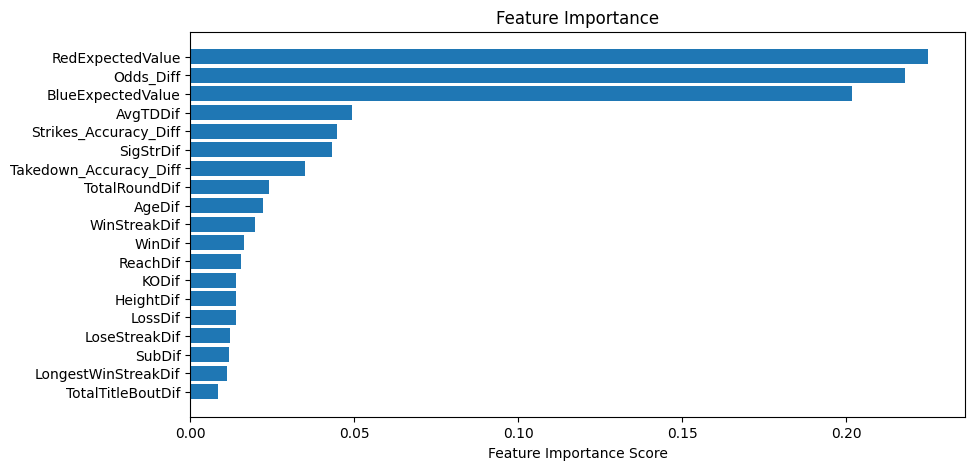

In [31]:
# Convert to DataFrame for easier plotting
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis() 
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance")
plt.show()


## 📈 Feature Importance
The model found that **these stats were the most important in predicting fight winners:**  

**Takedowns & Takedown Accuracy** – Fighters who control the ground game tend to win more.  
**Significant Strike Accuracy & Difference** – Landing cleaner strikes and absorbing fewer is crucial.  
**Total Rounds Fought** – Experience plays a big role, but too many rounds might indicate wear and tear.  
**Age Difference** – Younger fighters often have better durability and speed.  

Other than total rounds fought, Aspinall is at the advantage over Jones in everyone of these statistics!

## 🎯 **Conclusion & Next Steps**  

This **UFC Fight Predictor** was my first deep dive into **machine learning**, and it has been an exciting way to combine my passion for **UFC** with **data science**. The model performed well, but there’s still **room for improvement**.  

### **Model Performance** ✅  
Right now, the model's accuracy is **below 70%**, which means there’s a lot of potential to fine-tune it. While it correctly predicted several fight outcomes, improving **data quality and feature selection** could push accuracy even higher.  

### **Potential Improvements**   
- **Increase Accuracy to 70%+**  – Optimize hyperparameters, test more models, and refine features.  
- **Better Data Collection**  – Instead of using an existing dataset, I want to **scrape fight data directly from websites** to ensure it’s **fresh and accurate**.  
- **Feature Engineering**  – Explore new stats, such as **striking defense, cardio metrics, and fight pace** to improve predictions.  

### **Future Work**   
- **Deploy as a Web App**  – Make predictions interactive, so anyone can input fighter stats and get a result.  
- **Automate Data Scraping**  – Learn **web scraping** to pull fight stats directly from sources like **UFC stats pages**.  

### **Final Thoughts**  
This project was a **fun and practical** way to explore **machine learning**, and it’s only the beginning. The goal is to **refine the model, automate data collection, and build a web app**—turning this from a personal project into a fully functional UFC prediction tool.  
